Import the Following Libraries:   numpy, pandas, pylab and matplotlib 

In [1]:
%matplotlib inline

import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as pl

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.2


Load the dataset 

In [7]:
collision_df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")
print('Data downloaded and read into a dataframe!')

collision_df.head()

Data downloaded and read into a dataframe!


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Clean up the dataset to remove columns that are not informative to us for visualization 

In [8]:
# Remove columns, which are not informative

collision_df.drop(["X", "Y", "INCKEY","COLDETKEY","REPORTNO","STATUS","INTKEY","LOCATION","EXCEPTRSNCODE","EXCEPTRSNDESC",
                   "SEVERITYCODE.1", "SEVERITYDESC", "COLLISIONTYPE", "UNDERINFL","PEDCOUNT","PEDCYLCOUNT","INCDATE","INCDTTM",
                   "JUNCTIONTYPE","SDOT_COLCODE","SDOT_COLDESC", "PEDROWNOTGRNT","SDOTCOLNUM","ST_COLCODE","ST_COLDESC",
                   "SEGLANEKEY","CROSSWALKKEY","HITPARKEDCAR"] , 
                    axis=1 , inplace=True)
collision_df.head()

,SEVERITYCODE,OBJECTID,ADDRTYPE,PERSONCOUNT,VEHCOUNT,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,1,Intersection,2,2,NaN,Overcast,Wet,Daylight,NaN
1,1,2,Block,2,2,NaN,Raining,Wet,Dark - Street Lights On,NaN
2,1,3,Block,4,3,NaN,Overcast,Dry,Daylight,NaN
3,1,4,Block,3,3,NaN,Clear,Dry,Daylight,NaN
4,2,5,Intersection,2,2,NaN,Raining,Wet,Daylight,NaN


In [4]:
# Remove columns and rows, where at least one element is missing
collision_df.dropna(axis='columns')
collision_df.dropna()

,SEVERITYCODE,OBJECTID,ADDRTYPE,PERSONCOUNT,VEHCOUNT,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
1320,2,1519,Block,4,4,Y,Clear,Dry,Daylight,Y
1572,1,1814,Intersection,3,2,Y,Clear,Dry,Daylight,Y
2918,2,3376,Block,3,2,Y,Clear,Dry,Daylight,Y
3045,2,3534,Block,1,1,Y,Snowing,Snow/Slush,Daylight,Y
3499,1,4080,Block,2,1,Y,Overcast,Dry,Dark - Street Lights On,Y
...,...,...,...,...,...,...,...,...,...,...
193003,1,217591,Intersection,1,1,Y,Overcast,Wet,Dark - Street Lights On,Y
193395,2,218040,Block,4,4,Y,Clear,Dry,Daylight,Y
193524,2,218190,Intersection,2,2,Y,Clear,Dry,Daylight,Y
194088,2,218855,Block,2,2,Y,Raining,Wet,Daylight,Y


In [5]:
# For consistency, ensure that all column labels of type string.
# let's examine the types of the column labels
all(isinstance(column, str) for column in collision_df.columns)

# Set the OBJECT ID as index - useful for quickly looking up countries using .loc method.
collision_df.set_index("OBJECTID", inplace=True)

Exploratory Data Analysis - Lets first have a descriptive exploration on our data.

<AxesSubplot:xlabel='SEVERITYCODE'>

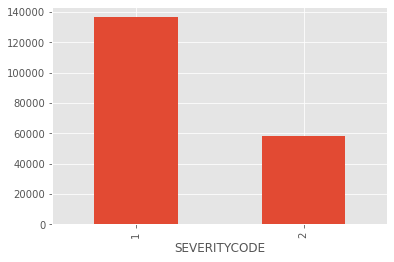

In [6]:
# Exploring the data related Severity Code
df1 = collision_df.value_counts('SEVERITYCODE')
df1.head()
df1.plot.bar()

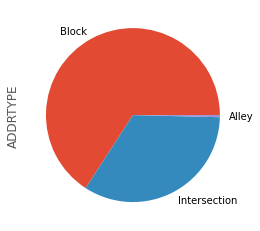

In [7]:
# Exploring the data related ADDRESS TYPE
df2 = collision_df['ADDRTYPE'].value_counts()
df2.plot(kind='pie')
plt.show()

C:\Users\ledinh\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


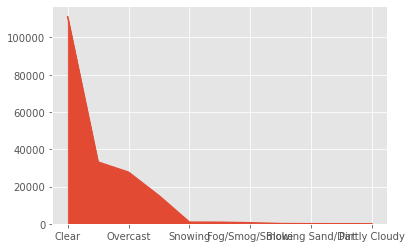

In [8]:
# Exploring the data related WEATHER
df2 = collision_df['WEATHER'].value_counts()
df2.plot(kind='area')
plt.show()

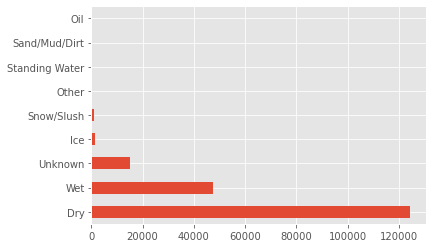

In [9]:
# Exploring the data related ROAD CONDITION
df2 = collision_df['ROADCOND'].value_counts()
df2.plot(kind='barh')
plt.show()

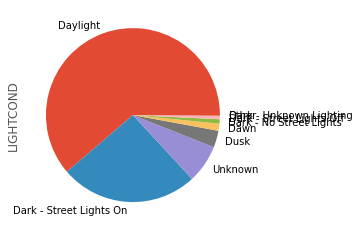

In [10]:
# Exploring the data related LIGHT CONDITION
df2 = collision_df['LIGHTCOND'].value_counts()
df2.plot(kind='pie')
plt.show()

Determine the relationships between the variables

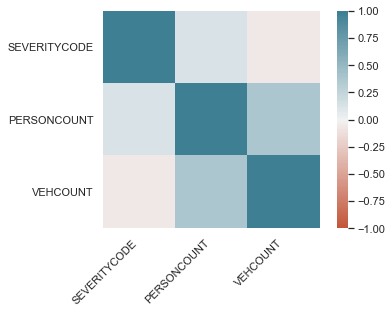

In [11]:
import seaborn as sns; sns.set_theme()

# corr_df = collision_df.drop("OBJECTID", axis=1)
corr = collision_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

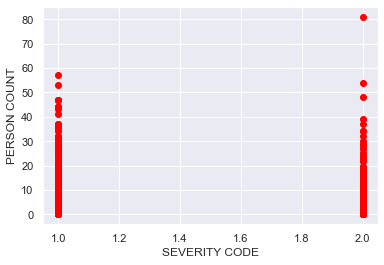

In [12]:
# Relationship between SEVERITY CODE and PERSON COUNT
plt.scatter(collision_df.SEVERITYCODE, collision_df.PERSONCOUNT,  color='red')
plt.xlabel("SEVERITY CODE")
plt.ylabel("PERSON COUNT")
plt.show()

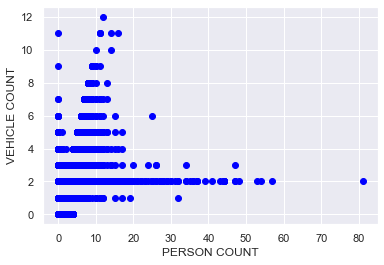

In [13]:
plt.scatter(collision_df.PERSONCOUNT, collision_df.VEHCOUNT,  color='blue')
plt.xlabel("PERSON COUNT")
plt.ylabel("VEHICLE COUNT")
plt.show()

Simple linear regression for representing the relationship

Train/Test Split step splits the dataset into training and testing sets, which are mutually exclusive. We will split the dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. 

To select the random rows, we create a mask using np.random.rand() function


In [14]:
msk = np.random.rand(len(collision_df)) < 0.8
train = collision_df[msk]
test = collision_df[~msk]

Coefficient and Intercept in the simple linear regression, which are the parameters of the fit line, are calculated 

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['PERSONCOUNT']])
train_y = np.asanyarray(train[['VEHCOUNT']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.17839939]]
Intercept:  [1.48559422]


we can plot the fit line over the data:

Text(0, 0.5, 'VEHICLE COUNT')

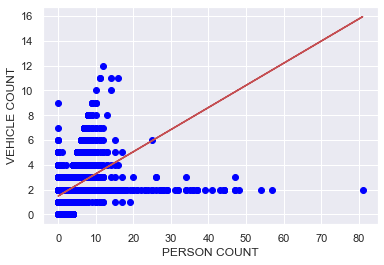

In [16]:
plt.scatter(train.PERSONCOUNT, train.VEHCOUNT,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("PERSON COUNT")
plt.ylabel("VEHICLE COUNT")

Machine learning modeling

In [17]:
# Check data types
collision_df.dtypes

SEVERITYCODE       int64
ADDRTYPE          object
PERSONCOUNT        int64
VEHCOUNT           int64
INATTENTIONIND    object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
SPEEDING          object
dtype: object

In [18]:
# Convert objects into categories
collision_df["WEATHER"] = collision_df["WEATHER"].astype('category')
collision_df["ROADCOND"] = collision_df["ROADCOND"].astype('category')
collision_df["LIGHTCOND"] = collision_df["LIGHTCOND"].astype('category')
collision_df["INATTENTIONIND"] = collision_df["INATTENTIONIND"].astype('category')
collision_df["SPEEDING"] = collision_df["SPEEDING"].astype('category')
collision_df["ADDRTYPE"] = collision_df["ADDRTYPE"].astype('category')
collision_df.dtypes

SEVERITYCODE         int64
ADDRTYPE          category
PERSONCOUNT          int64
VEHCOUNT             int64
INATTENTIONIND    category
WEATHER           category
ROADCOND          category
LIGHTCOND         category
SPEEDING          category
dtype: object

In [19]:
# Convert categories into numerical type (i.e INT)
collision_df["WEATHER"] = collision_df["WEATHER"].cat.codes
collision_df["ROADCOND"] = collision_df["ROADCOND"].cat.codes
collision_df["LIGHTCOND"] = collision_df["LIGHTCOND"].cat.codes
collision_df["INATTENTIONIND"] = collision_df["INATTENTIONIND"].cat.codes
collision_df["SPEEDING"] = collision_df["SPEEDING"].cat.codes
collision_df.dtypes

SEVERITYCODE         int64
ADDRTYPE          category
PERSONCOUNT          int64
VEHCOUNT             int64
INATTENTIONIND        int8
WEATHER               int8
ROADCOND              int8
LIGHTCOND             int8
SPEEDING              int8
dtype: object

In [20]:
# Machine learning Feature Sets
X_df=collision_df[["SPEEDING","INATTENTIONIND","WEATHER","ROADCOND","LIGHTCOND","SPEEDING"]].values
y_df=collision_df[["SEVERITYCODE"]].values

In [21]:
# Test/Train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=4)
y_train = y_train.ravel()
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 6) (155738,)
Test set: (38935, 6) (38935, 1)


K in K Nearst Neigbours (KNN), is the number of nearest neighbors to examine, which is supposed to be specified by the User. To choose right value for K, chose k =1 to calculate the accuracy of prediction using all samples in the test set and increase the k to find which k is the best for the model.

We can calculate the accuracy of KNN for different Ks.

In [22]:
# K Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 6
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.52269167, 0.69392577, 0.68455118, 0.6953127 , 0.68647746])

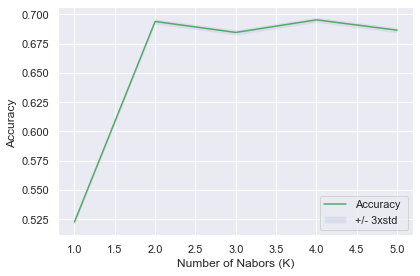

In [23]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [24]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6953127006549377 with k= 4


In [26]:
# Best accuracy was with k = 4
k = 4
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

knn_y_pred = knn.predict(X_test)
knn_y_pred[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [27]:
# KNN Evaluation
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

knn_js = jaccard_score(y_test, knn_y_pred)
knn_f1 = f1_score(y_test, knn_y_pred, average='macro')
print ('KNN - Jaccard_score:', knn_js)
print ('KNN - F1 score:', knn_f1)

KNN - Jaccard_score: 0.6927081984198938
KNN - F1 score: 0.4355822353605406


In [53]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
collisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

collisionTree.fit(X_train,y_train)
predTree = collisionTree.predict(X_test)

In [54]:
# Decision Tree Evaluation
tree_js = jaccard_score(y_test, predTree)
tree_f1 = f1_score(y_test, predTree, average='macro')
print ('Decision tree - Jaccard_score:', tree_js)
print ('Decision tree - F1 score:', tree_f1)

Decision tree - Jaccard_score: 0.7043715004880053
Decision tree - F1 score: 0.41336032198083383


In [56]:
# Regression
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

LR_pred = LR.predict(X_test)
LR_prob = LR.predict_proba(X_test)
reg_ll = log_loss(y_test, LR_prob)
print ('Regression - Log loss:', reg_ll)


Regression - Log loss: 0.5986679016584695


In [57]:
# Regression evaluation
reg_js = jaccard_score(y_test, LR_pred)
reg_f1 = f1_score(y_test, LR_pred, average='macro')
print ('Regression - Jaccard_score:', reg_js)
print ('Regression - F1 score:', reg_f1)

Regression - Jaccard_score: 0.704227884516593
Regression - F1 score: 0.41348440648219276
